In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pathlib


In [3]:
pathToData="H:\Programmieren\CSE\DatenorientierteProgrammierParadigmen\DOPP_project\dopp_proj\DataSets"

In [4]:
countries=[
    "Canada", "Mexico", "US", "Total North America", 
    "Argentina", "Brazil", "Chile", "Colombia", "Ecuador", "Peru", "Venezuela", "Total S. & Cent. America",
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", 
    "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
    "Other Europe", "Total Europe",
    "Azerbaijan", "Belarus", "Kazakhstan", "Russian Federation", "Turkmenistan", "USSR", 
    "Uzbekistan", "Other CIS", "Total CIS",
    "Iran", "Iraq", "Israel", "Kuwait", "Oman", "Qatar", "Saudi Arabia", "United Arab Emirates",
    "Other Middle East", "Total Middle East", 
    "Algeria", "Egypt", "Morocco", "South Africa", "Eastern Africa", "Middle Africa", "Western Africa",
    "Other Northern Africa", "Other Southern Africa", "Total Africa", 
    "Australia", "Bangladesh", "China", "China Hong Kong SAR", "India", "Indonesia", "Japan", "Malaysia", 
    "New Zealand", "Pakistan", "Philippines", "Singapore", "South Korea", "Sri Lanka", "Taiwan", "Thailand", 
    "Vietnam", "Total Asia Pacific"

]

In [5]:
def load_NuclearGenData(filepath, countries):
    df=pd.read_excel(os.path.join(filepath, "bp-stats-review-2022-all-data.xlsx"), sheet_name="Nuclear Generation - TWh", header=2)
    df=df.rename(columns={"Terawatt-hours": "country"})
    
    df=df.set_index("country")
    
    df=df.loc[countries]
    
    df=df.loc[:, 1965:2021]
    
    df=df.stack()
    
    df=df.fillna(0.0)
    
    return df

In [61]:
def load_gdpData(filepath, countries):
    df=pd.read_csv(os.path.join(filepath, "GDP.csv"), sep=",", header=2)
    df=df.rename(columns={"Country Name": "country"})
    df=df.set_index("country")

    df=df.iloc[:,8:-1]
    
    df=df.rename(index={"United States": "US", "Venezuela, RB": "Venezuela", "Czechia": "Czech Republic", "Slovak Republic": "Slovakia", 
            "Turkiye": "Turkey", "Iran, Islamic Rep.": "Iran", "Egypt, Arab Rep.": "Egypt", "Korea, Rep.": "South Korea"})
    cntries=[cntry for cntry in countries if cntry in df.index]
    #print([cntry for cntry in countries if cntry in df.index])
    #print([cntry for cntry in countries if cntry not in df.index])
    df=df.loc[cntries]
    
    df=df.rename(columns={cols:int(cols) for cols in df.columns})
    #print(df.columns)
    df=df.stack()
    #print(df)
    return df

In [62]:
def load_popRedData(filepath, countries):
    df=pd.read_csv(os.path.join(filepath, "PopReduced.csv"), sep=",", header=0)
    df=df.set_index("country")
    df=df.rename(index={"United States": "US", 'United States of America': "US", "Venezuela, RB": "Venezuela",  'Venezuela (Bolivarian Republic of)': "Venezuela", "Czechia": "Czech Republic", "Slovak Republic": "Slovakia", 
            "Turkiye": "Turkey", 'Türkiye': "Turkey", "Iran, Islamic Rep.": "Iran", 'Iran (Islamic Republic of)': "Iran", "Egypt, Arab Rep.": "Egypt", 
            "Korea, Rep.": "South Korea", 'Republic of Korea': "South Korea", 'Viet Nam': "Vietnam"})
    cntries=list(set(cntry for cntry in df.index if cntry in countries))
    #print(cntries)
    df=df.drop(columns=["ISO3 Alpha-code"])
    df=df.loc[cntries]
    return df

In [63]:
df_Nuclear=load_NuclearGenData(pathToData, countries)
df_GDP=load_gdpData(pathToData, countries)
df_Pop=load_popRedData(pathToData, countries)

Text(0, 0.5, 'TWh')

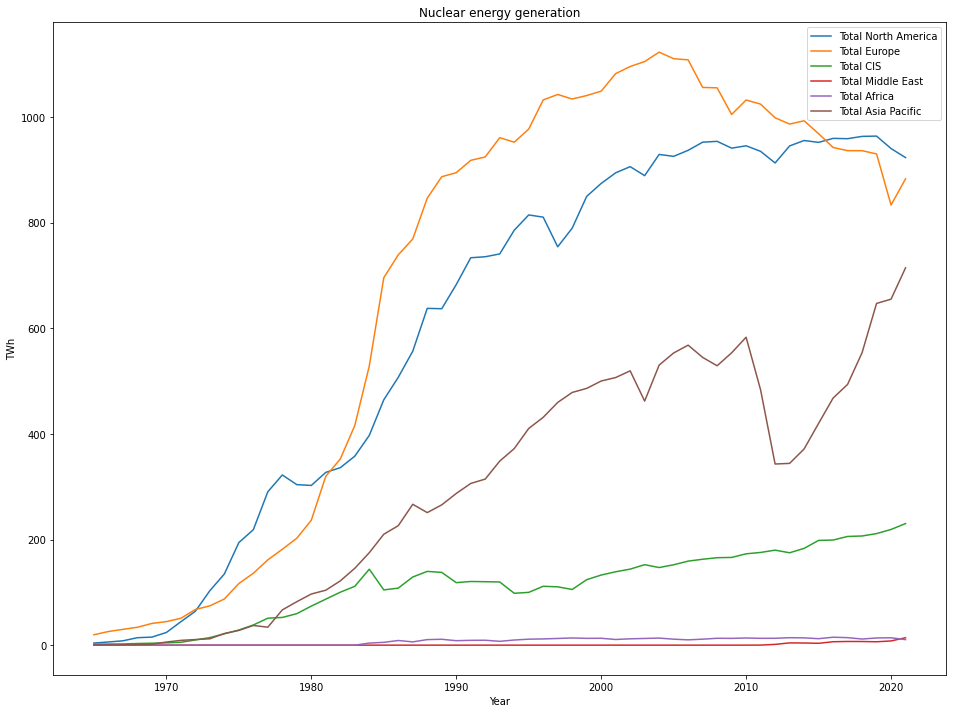

In [53]:
fig, ax = plt.subplots()
for cntry in ["Total North America", "Total Europe", "Total CIS", "Total Middle East", "Total Africa", "Total Asia Pacific"]:
    df_Nuclear[cntry].plot(ax=ax, figsize=(16,12), label=cntry)
ax.legend()
ax.set_title("Nuclear energy generation")
ax.set_xlabel("Year")
ax.set_ylabel("TWh")


In [64]:
cntries=list(set(cnt[0] for cnt in df_GDP.index).intersection(set(cnt[0] for cnt in df_Nuclear.index)))
print(cntries)

['Denmark', 'Greece', 'Kazakhstan', 'Italy', 'Ecuador', 'Turkmenistan', 'Uzbekistan', 'Morocco', 'Saudi Arabia', 'Indonesia', 'Brazil', 'Pakistan', 'Austria', 'China', 'Philippines', 'Turkey', 'Belarus', 'North Macedonia', 'South Korea', 'Luxembourg', 'Thailand', 'Switzerland', 'Egypt', 'Lithuania', 'Netherlands', 'Slovakia', 'Venezuela', 'Sweden', 'Germany', 'South Africa', 'Chile', 'Czech Republic', 'Singapore', 'Iceland', 'Poland', 'Israel', 'Oman', 'Iran', 'Belgium', 'Peru', 'Croatia', 'United Kingdom', 'Qatar', 'India', 'Ukraine', 'Azerbaijan', 'France', 'Japan', 'Norway', 'US', 'Latvia', 'Romania', 'Malaysia', 'New Zealand', 'Slovenia', 'Sri Lanka', 'Cyprus', 'Australia', 'Bulgaria', 'Bangladesh', 'Estonia', 'Vietnam', 'Kuwait', 'United Arab Emirates', 'Finland', 'Algeria', 'Portugal', 'Colombia', 'Argentina', 'Hungary', 'Spain', 'Iraq', 'Ireland', 'Canada', 'Russian Federation', 'Mexico']


In [65]:
df_Pop.loc[cntries]

,Year,"Total Population, as of 1 January (thousands)","Life Expectancy at Birth, both sexes (years)"
country,,,
Denmark,1950,4251.526,70.308
Denmark,1951,4283.862,70.924
Denmark,1952,4315.296,70.759
Denmark,1953,4346.217,71.172
Denmark,1954,4378.749,71.339
...,...,...,...
Mexico,2017,122210.952,74.138
Mexico,2018,123467.563,74.015
Mexico,2019,124560.160,74.202


In [66]:
#df_NukeGDP=pd.concat([df_Nuclear[cntries], df_GDP, df_Pop], axis=1)
#df_NukeGDP=df_NukeGDP.rename(columns={0: "Nuclear Generation TWh", 1: "GDP"})
df=df_Pop[df_Pop["Year"]>=1965]

df.insert(1, "GDP", df_GDP)


In [68]:
df

,Year,GDP,"Total Population, as of 1 January (thousands)","Life Expectancy at Birth, both sexes (years)"
country,,,,
Denmark,1965,NaN,4736.652,72.388
Denmark,1966,NaN,4776.023,72.466
Denmark,1967,NaN,4816.783,72.954
Denmark,1968,NaN,4852.678,73.146
Denmark,1969,NaN,4882.790,73.243
...,...,...,...,...
Mexico,2017,NaN,122210.952,74.138
Mexico,2018,NaN,123467.563,74.015
Mexico,2019,NaN,124560.160,74.202
